In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_quiz.csv to dataset_quiz.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('dataset_quiz.csv')
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [ ]:
# Seleksi fitur
# Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal_dimension_worst'
X = df.iloc[:,7:-8]
# converted = type(df['keterlibatan_vltr'])
y = df['keterlibatan_vltr']
y = y.map({'YA':1, 'TIDAK':0}) # Encode label

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.svm import SVC 

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test) # prediksi

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

Confusion Matrix: 
 [[8 0]
 [0 9]]


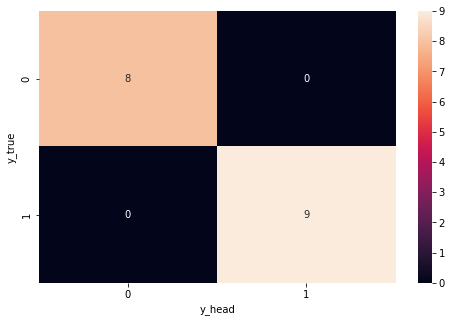

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()


In [ ]:
TP = true_pos = 9
TN = true_neg = 8
FP = false_pos = 0
FN = false_neg = 0

In [ ]:
results = {}

#### Accuracy 
jumlah contoh yang diprediksi dengan benar / jumlah total contoh  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [ ]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  1.000


#### True Positive Rate (Recall)
jumlah sampel sebenarnya dan diprediksi sebagai `Positive` / jumlah sampel sebenarnya `Positive`  
juga disebut sebagai **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


In [ ]:
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  1.000


#### True Negative Rate (Specificity)
jumlah sampel sebenarnya dan diprediksi sebagai `Negative` / jumlah sampel sebenarnya `Negative`  
juga disebut sebagai **Specificity**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)


In [ ]:
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  1.000


#### Positive Predictive Value (Precision)
jumlah sampel sebenarnya dan diprediksi sebagai `Positive` / jumlah total sampel diprediksi sebagai `Positive`  
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)


In [ ]:
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  1.000


#### Negative Predictive Value (Precision)
jumlah sampel sebenarnya dan di prediksi sebagai  `Negative` / jumlah total sampel diprediksi sebagai `Negative`    
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6da0f59faffbc1704974e97847ab4fa599f5521)


In [ ]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  1.000


#### F1 score
Rata-rata Harmonic dari Precision dan Recall.  
![alt text](https://images.deepai.org/user-content/9954225913-thumb-4901.svg)

In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  1.000


#### Matthew's correlation coefficient
Matthew's coefficient berkisar antara `[-1, 1]`. `0` biasanya memiliki arti prediksi yang benar-benar acak. `1` bermakna perfect classifier, sedangkan nilai negatif (`[-1, 0)`) menunjukkan korelasi negatif antara prediksi dan nilai aktual.   

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5caa90fc15105b74b59a30bbc9cc2e5bd43a13b7)

In [ ]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  1.000


# **Membandingkan metrik yang telah dihitung**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
print(f"Calculated and Actual Accuracy:                          {results['ACC']: .3f}, {accuracy_score(y_test, y_pred): .3f}")
print(f"Calculated and Actual Precision score:                   {results['PPV']: .3f}, {precision_score(y_test, y_pred): .3f}")
print(f"Calculated and Actual Recall score:                      {results['TPR']: .3f}, {recall_score(y_test, y_pred): .3f}")
print(f"Calculated and Actual F1 score:                          {results['F1']: .3f}, {f1_score(y_test, y_pred): .3f}")
print(f"Calculated and Actual Matthew's correlation coefficient: {results['MCC']: .3f}, {matthews_corrcoef(y_test, y_pred): .3f}")

Calculated and Actual Accuracy:                           1.000,  1.000
Calculated and Actual Precision score:                    1.000,  1.000
Calculated and Actual Recall score:                       1.000,  1.000
Calculated and Actual F1 score:                           1.000,  1.000
Calculated and Actual Matthew's correlation coefficient:  1.000,  1.000


### ROC curve (Receiver Operating Characteristic curve)
Kurva karakteristik operasi penerima, seperti **ROC curve**, adalah plot grafis yang menggambarkan kemampuan diagnostik sistem pengklasifikasi biner karena ambang batas diskriminasinya bervariasi.  
 ROC curve dibuat dengan memplot **True Positive Rate (TPR)** berlawanan **False Positive Rate (FPR)** dengan berbagai variasi setting pada threshold.    


In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
def get_roc_curve(y_test, y_pred, delta=0.1):

    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_pred.shape)
    for th in thresh:
        y_pred[y_pred < th] = 0
        y_pred[y_pred >= th] = 1
        
        
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [ ]:
delta = 0.001
FPRs, TPRs, _ = get_roc_curve(y_test, y_pred, delta)

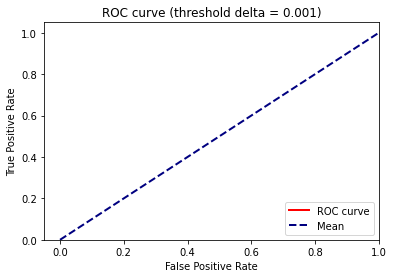

In [ ]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

Puncak menuju sudut paling kiri berarti pengklasifikasi mendekati sempurna, sedangkan prediksi acak akan memiliki kurva sebagai garis lurus putus-putus biru. Kurva ROC ini memberi tahu bahwa model yang telah dibuat merupakan classifier yang hampir sempurna, dengan akurasi tinggi

### ROC-AUC Score
Sekarang, setelah kita mengetahui tentang kurva ROC, apa yang diwakilinya, **AUC Score** sangat mudah dipahami.
AUC adalah singkatan dari **Area di bawah Kurva**, yang tidak lain adalah area di bawah kurva ROC yang dibentuk oleh prediksi.
Seperti yang kita lihat, prediksi yang benar-benar acak akan memiliki  AUC Score `0,5`, sedangkan pengklasifikasi sempurna akan memiliki skor AUC `1`.

In [ ]:
auc_score = roc_auc_score(y_test, y_pred)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  1.0000
